In [ ]:
import glob
import os
import shutil
import tensorflow as tf
from keras import Sequential,models
from keras.layers import Dense,Flatten,BatchNormalization,Conv2D,MaxPooling2D,MaxPool2D, Dropout, GlobalAveragePooling2D,Activation
from keras.applications.vgg16 import VGG16
# from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
from tensorflow import keras
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.image import imread
import pathlib
from sklearn.metrics import classification_report, confusion_matrix

# %matplotlib inline

In [ ]:
train_dir ='/content/drive/MyDrive/tasks/stylumia/train'
val_dir = '/content/drive/MyDrive/tasks/stylumia/val'

In [ ]:
img_width=150
img_height=150
batch_size=128

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    # subset="training",
                                                    class_mode='sparse',
                                                    target_size=(img_height, img_width))

Found 14505 images belonging to 7 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

val_generator = train_datagen.flow_from_directory(val_dir,
                                                    batch_size=batch_size,
                                                    # subset="training",
                                                    class_mode='sparse',
                                                    target_size=(img_height, img_width))

Found 3609 images belonging to 7 classes.


In [ ]:
img_shape = 150
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(img_shape,img_shape,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])


In [ ]:

filepath="/content/drive/MyDrive/tasks/stylumia/resnet50/VGG16_150-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(train_generator,epochs=40,validation_data=val_generator,callbacks=callbacks_list)


Epoch 1/40
114/114 [==============================] - ETA: 0s - loss: 2.4582 - accuracy: 0.1892 
Epoch 1: val_accuracy improved from -inf to 0.11582, saving model to /content/drive/MyDrive/tasks/stylumia/resnet50/VGG16_150-01-0.12.hdf5
114/114 [==============================] - 2537s 22s/step - loss: 2.4582 - accuracy: 0.1892 - val_loss: 3.4223 - val_accuracy: 0.1158
Epoch 2/40
114/114 [==============================] - ETA: 0s - loss: 2.0896 - accuracy: 0.2583
Epoch 2: val_accuracy improved from 0.11582 to 0.23192, saving model to /content/drive/MyDrive/tasks/stylumia/resnet50/VGG16_150-02-0.23.hdf5
114/114 [==============================] - 231s 2s/step - loss: 2.0896 - accuracy: 0.2583 - val_loss: 103.7298 - val_accuracy: 0.2319
Epoch 3/40
114/114 [==============================] - ETA: 0s - loss: 1.9424 - accuracy: 0.2826
Epoch 3: val_accuracy did not improve from 0.23192
114/114 [==============================] - 226s 2s/step - loss: 1.9424 - accuracy: 0.2826 - val_loss: 46.7859 -

Text(0.5, 0, 'epochs')

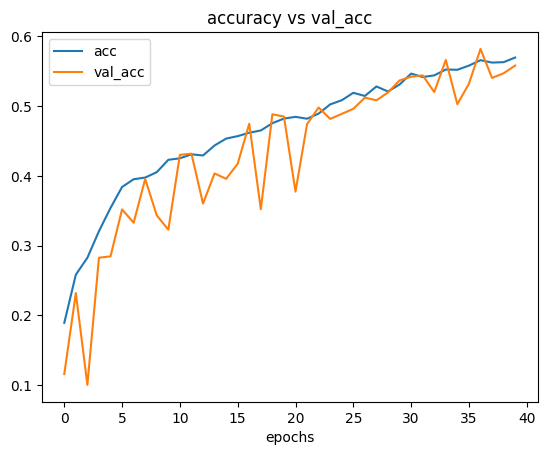

In [ ]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.title('accuracy vs val_acc')
plt.legend()
plt.xlabel('epochs')

In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/tasks/stylumia/resnet50/model_2.h5')


In [ ]:
history = loaded_model.fit(train_generator,epochs=100,validation_data=val_generator,callbacks=callbacks_list)

Epoch 1/100
 53/114 [============>.................] - ETA: 2:14:53 - loss: 0.8537 - accuracy: 0.6534

In [ ]:
import os

def count_files(folder_path):
    total_files = 0
    
    for root, dirs, files in os.walk(folder_path):
        total_files += len(files)
    
    return total_files

folder_path = '/content/drive/MyDrive/tasks/stylumia/train'  # Replace with the actual path to your folder
total_files = count_files(folder_path)
print(f"Total number of files: {total_files}")


Total number of files: 14505
